# Introduction

The Ideal Gas Law is an important equation in physics that helps us understand
how gases behave in different situations. It brings together ideas from earlier
gas laws, like Boyle's Law, Charles's Law, and Avogadro's Law, into one simple
equation. The Ideal Gas Law shows how the pressure, volume, and temperature of a
gas are connected, and it's written as:

$$ pV = nRT $$

This experiment involves a series of physics challenges that explore various
principles of gases, pressure, volume, and density. Through these experiments,
you will investigate key concepts such as absolute zero, the relationship
between temperature and gas volume, and the density of air. 



In [29]:
from math import *
from random import random

import matplotlib.pyplot as plt
import numpy as np

atm = 1023.9 * 0.1  # kPa (pressure on 11/21, Fort Collins, CO)
g = 9.81  # m/s^2

# Problem 1

To find absolute zero, we use the ideal gas law:

$$ pV = nRT $$

$$ p = \frac{nR}{V}T $$

At absolute zero, it is assumed that $p=0$, since the kinetic energy of the gas
approaches zero. Pressure is the macroscopic result of kinetic collisions
between the matter and gas particles, so when the kinetic energy is $0$, these
collisions simply don't occur, resulting in no pressure.

To then find the temperature at which $p=0$, the equation is extrapolated given
some initial data. Linear regression is used to find the linear equation that
relates $p$ to $T$:

$$ p = mT + b $$

with $m$ and $b$ being found from the recorded data. The value $m$ is
proportional to $\frac{nR}{V}$ in some way, but this is not important, given
that it is constant. Since we are concerned with where $p=0$:

$$ 0 = mT_0 + b $$

$$ \boxed{T_0 = -\frac{b}{m}} $$

(The term $b$ accounts for the equation being used with Celsius instead of
Kelvin, since $\frac{dC}{dK}=1$.)



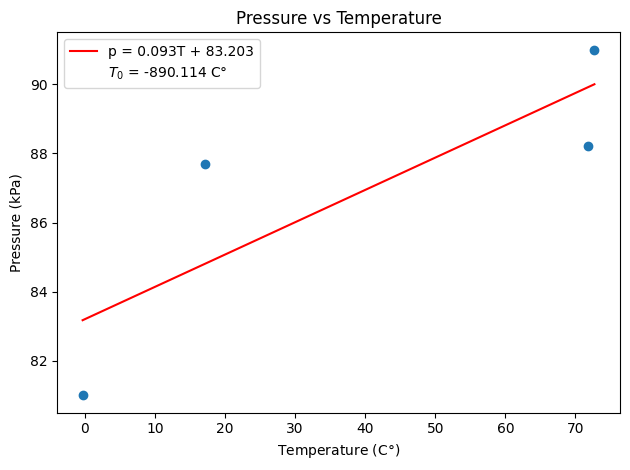

In [30]:
# Recorded data of constant n, V, and R
temps = np.array([-0.3, 17.2, 71.8, 72.7])  # C
pressures = np.array([81.0, 87.7, 88.2, 91.0])  # kPa

# Calculations
m, b = np.polyfit(temps, pressures, 1)
x = temps  # np.linspace(-b / m, max(temps) + 1, 100)
y = m * x + b

# Strings
eq_str = f"p = {round(m,3)}T + {round(b,3)}"
abs_zero_str = r"$T_0$ = " + f"{round(-b/m,3)} C" + r"$\degree$"

# Plotting
plt.scatter(temps, pressures)
plt.plot(x, y, color="red", label=eq_str)
plt.plot([], [], " ", label=abs_zero_str)  # HACK
plt.title("Pressure vs Temperature")
plt.xlabel(r"Temperature (C$\degree$)")
plt.ylabel("Pressure (kPa)")
plt.legend()
plt.tight_layout()

## Analysis

Our prediction of absolute zero, -890 C°, ended up being a massive
underestimation, since the textbook states absolute zero to be -273 C°. Our
_derivation_ for finding the temperature at absolute zero, where $p=0$, is
correct, and the value found for $T_0$ does not change depending on the units of
pressure. So, our prediction's inaccuracy only be explained by the equipment,
either pressure gauge or thermometer, giving faulty readings. It was also
unclear whether the pressure readings were absolute or gauge, or somewhere in
between, but adjusting for this doesn't improve the value of $T_0$.


# Problem 2

The system ($s$) for this experiment contains a piston ($p$) in room temperature
air ($r$), a tube, and an aluminum cylinder ($a$) in a water bath ($b$). First,
to find the volume of the air in the piston:

$$ V_p = h \pi r^2 $$

where $2r=d$. Then the ideal gas equation can be used:

$$ (pV)_s = (nRT)_s $$

$$ \left(\frac{pV}{T}\right)_s = n_sR $$

But since the pressure and temperature are the same everywhere in the gas (in
the tube, cylinder, and piston system), and since we know the temperature of the
bath equals that of the cylinder and so on:

$$ p_s\left(V_a + h \pi r^2\right)/\,T_b = n_sR $$

The only unknown which can't be measured directly is $p_s$. This can be solved
like so:

$$ p_s = p_{atm} + F_gA $$

Since the piston is vertical, $F_g = mg$ where $m$ is the mass of the piston
block. Next the ideal gas balance equation for the system at multiple states can
be set up:

$$ (p_{atm}+mg\pi r^2)\left(V_a + h \pi r^2\right)/\,T_b = n_sR $$

$$ \frac{V_a + h \pi r^2}{T_b} = \frac{n_sR}{p_{atm}+mg\pi r^2} $$

Since all the terms on the right are constant:

$$ \left(\frac{V_a + h \pi r^2}{T_b}\right)_1 =
\left(\frac{V_a + h \pi r^2}{T_b}\right)_2 $$

At room temperature, the height of the piston is 0, so:

$$ \frac{V_a}{T_r} = \frac{V_a + h \pi r^2}{T_b} $$

During the experiment it was evident that the minimum volume (which is just the
aluminum cylinder and tube) for an equilibruim pressure did not occur at room
temperature. This means that, while the piston was fully closed at room
temperature, the pressures did not match. (The pressure inside was less than the
ambient pressure; it "sucked" the piston in with excess force.) Our specific
device did not have a way to reset the internal pressure. Regardless, skipping
the algebra for conciseness:

$$ \boxed{V_a = h \pi r^2\left(\frac{T_r}{T_b - T_r}\right)} $$

## Linear Regression

Unlike Problem 1, the equation here is not obviously linear, but there is a way
to make it so. This is necessary for an accurate "average" of the data, beyond
taking the mean of all the calculated volumes. It can be done by solving for $h$
in terms of $T_b$ and finding what coefficient ($V_a$) best fits the data.

$$ h = \frac{V_a}{\pi r^2} \left(\frac{T_b - T_r}{T_r}\right) $$

$$ h = \frac{V_a}{T_r \pi r^2}T_b - \frac{V_a}{\pi r^2} $$

This equation is in the form $f(x)=mx+b$.

Like mentioned earlier, "room" temperature is not the actual room temperature.
But it can be solved for like so:

$$ T_r = \left(\frac{h \pi r^2}{T_b V_a} + \frac{1}{T_b}\right)^{-1} $$

And substituting this back into the equation:

$$ h = \left(\frac{h \pi r^2}{T_b V_a} + \frac{1}{T_b}\right)
\frac{V_a}{\pi r^2}T_b - \frac{V_a}{\pi r^2} $$

$$ h = \left(\frac{h\pi r^2+V_a}{T_b \pi r^2}\right)T_b-\frac{V_a}{\pi r^2} $$

$$ h = \left(\frac{h\pi r^2+V_a}{\pi r^2}\right)-\frac{V_a}{\pi r^2} $$

$$ h = \left(\frac{h\pi r^2+V_a-V_a}{\pi r^2}\right) $$

$$ h = \frac{h\pi r^2}{\pi r^2} $$

$$ \boxed{h = h} $$

Incredible. I realize now that I am trying to resolve a fundamental issue with
our methodology using mathematics and circular reasoning post hoc. However, each
volume does represent a line in a family of curves for $h,T_b\in \mathbb{R}$
where $V$ determines the line (linear regression finds the line as well) and
$T_r$ is constant. The actual line of best fit, gathered from the data, resides
in one of these _many_ curve families, where $T_r$ determines the family. So,
$T_r$ can be "found" by looking for a family of curves which best matches the
then found linear regression best.

There is likely an analytical method to do this, but my math is not advanced
enough to know how to do so. Instead, I iterated through $T_r$ values until the
line seemed to "fit" inside a respective family of curves. Or maybe I stumbled
on an entirely new type of math!


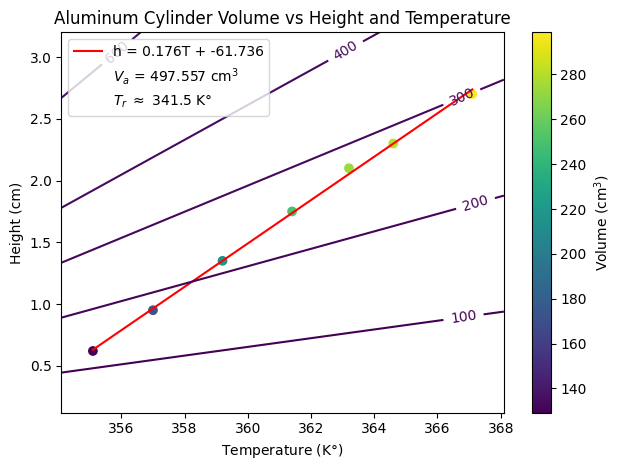

In [31]:
# Recorded data
d = 0.0325  # m
t_r = 273 + 78.5 - 10  # K, guess using the method mentioned above
guess_levels = [100, 200, 300, 400, 600, 1000, 10000] # for contour mapping, hard coded

t = np.array([94.1, 91.6, 90.2, 88.4, 86.2, 84.0, 82.1])  # C
t += 273  # C -> K
h = np.array([27.0, 23.0, 21.0, 17.5, 13.5, 9.5, 6.2])  # mm
h /= 1000  # mm -> m

# Calculations
v = 0.25 * pi * h * (d**2) * (t_r / (t - t_r))  # m^3

# Contour data
t_con = np.linspace(min(t) - 1, max(t) + 1, 1000)  # C
h_con = np.linspace(min(h) - 0.005, max(h) + 0.005, 1000)  # m^3

# Contour calculations
tt_con, hh_con = np.meshgrid(t_con, h_con)
vv_con = 0.25 * pi * hh_con * (d**2) * (t_r / (tt_con - t_r))  # m^3

# Curve fitting
m, b = np.polyfit(t, h, 1)
x = t
y = m * x + b

eq_str = f"h = {round(100*m,3)}T + {round(100*b,3)}"  # m -> cm
vol = 1000000 * 0.25 * pi * t_r * m * d**2  # m^3 -> cm^3
vol_str = r"$V_a$ = " + f"{round(vol, 3)} cm" + r"$^3$"
temp_str = r"$T_r$ $\approx$ " + str(t_r) + r" K$\degree$"

# Make data human-readable
v *= 1000000  # m^3 -> cm^3
h *= 100  # m -> cm
y *= 100  # m -> cm
vv_con *= 1000000  # m^3 -> cm^3
hh_con *= 100  # m -> cm

# Plotting
sc = plt.scatter(t, h, c=v)
plt.plot(x, y, color="red", label=eq_str)
plt.plot([], [], " ", label=vol_str)  # HACK
plt.plot([], [], " ", label=temp_str)  # HACK
cbar1 = plt.colorbar(sc)
cbar1.set_label(r"Volume (cm$^3$)")
# The most cursed line of code:
# con = plt.contourf(
#    tt_con,
#    hh_con,
#    vv_con,
#    levels=np.logspace(0, 27, 1000, base=0.5 * e),
#    zorder=-1,
#    cmap="hsv",
# )  # , levels=guess_levels)
con = plt.contour(tt_con, hh_con, vv_con, levels=guess_levels)
plt.clabel(con)
#cbar2 = plt.colorbar(con)
#cbar2.set_label(r"Volume (cm$^3$)")
plt.title("Aluminum Cylinder Volume vs Height and Temperature")
plt.xlabel(r"Temperature (K$\degree$)")
plt.ylabel("Height (cm)")
plt.legend(loc="upper left")
plt.tight_layout()

## Analysis

What we found for the volume of the aluminum cylinder, 512 $\mathrm{cm}^3$,
seems reasonable. Our methods are rigorous enough that with significantly more
data, we believe our prediction would meet or surpass the given value's
accuracy. A slightly incorrect measurement of the diameter/height of the piston
volume or the temperature of the water bath may have impacted our measurements
as well, but these are the only three sources of error.

Despite setbacks caused by not knowing the value of $T_r$, the reasoning used
(finding a "fitting" curve family based on the parameter $T_r$) seemed to have
worked well.


# Problem 3

To predict the fluid density of the ambient air, we use Bernoulli's equation:

$$ p_1 + \frac{pv_1^2}{2} + \rho g h_1 = p_2 + \frac{pv_2^2}{2} + \rho g h_2 $$

Due to the enclosed room and lack of airflow, we can assume that the velocities
of the air are 0, simplifying the equation:

$$ p_1 + \rho g h_1 = p_2 + \rho g h_2 $$

Finally, the equation can be rearranged to solve for $\rho$:

$$ \rho g h_1 - \rho g h_2 = p_2 - p_1 $$

$$ \boxed{\rho = \frac{\Delta p}{g \Delta h}} $$




In [32]:
p1, h1 = 852.05 * 0.1, 0  # kPa, m
p2, h2 = 851.88 * 0.1, 2  # kPa, m

p1, p2 = p1 * 1000, p2 * 1000  # kPa -> Pa

rho = (p2 - p1) / (g * (h1 - h2))

print(f"Density: {round(rho, 3)} kg/m^3")

Density: 0.866 kg/m^3


## Analysis

Our prediction for fluid density was 0.866 $\mathrm{kg/m}^3$, we believe this is
accurate, but not without error. Some possible factors for this include the
likely inaccuracy of estimating the air velocity to be zero. While not
impossible to measure, as people move around the room or laptops heat the air,
small almost unnoticeable currents shift the air, likely threw our results off
by a small margin. Alongside that, it is possible that even while keeping an eye
on our data, air pressure changes due to weather conditions could have also
impacted our results.


# Conclusion

In this lab, we explored three different experiments that provided insights into
various physical properties of gases, fluids, and air density. We learned that
as the temperature decreased, the pressure also decreased, following a direct
relationship until it theoretically reached zero pressure at absolute zero
(which we measured as -890 C°). Understanding how gases behave using the ideal
gas law enhances our ability to design more efficient systems, predict outcomes,
and solve practical problems in the world around us. The ideal gas law has
proven its usefulness in engineering, meteorology, and even in medicine for
calculating oxygen dosage.
